# MNHD - Medinet Nasr Housing

In [5]:
from data_functions import *

I will be giving investment recommendations for the company MNHD in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [6]:
MNHD = pd.read_csv('./Data/Egypt - Medinet Nasr Housing (MNHD).csv')
MNHD

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",3.75,3.74,3.82,3.71,1.57M,0.54%
1,"Mar 30, 2021",3.73,3.71,3.76,3.67,3.43M,0.81%
2,"Mar 29, 2021",3.7,3.69,3.73,3.68,1.25M,-0.27%
3,"Mar 28, 2021",3.71,3.76,3.76,3.68,2.34M,0.00%
4,"Mar 25, 2021",3.71,3.62,3.78,3.59,2.50M,1.37%
...,...,...,...,...,...,...,...
301,"Jan 08, 2020",4.41,4.19,4.59,4.15,3.52M,3.04%
302,"Jan 06, 2020",4.28,4.16,4.44,4.12,2.52M,-2.95%
303,"Jan 05, 2020",4.41,4.7,4.7,4.33,3.76M,-8.32%
304,"Jan 02, 2020",4.81,4.81,4.87,4.78,241.60K,-0.21%


In [7]:
MNHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      306 non-null    object
 1   Price     306 non-null    object
 2   Open      306 non-null    object
 3   High      306 non-null    object
 4   Low       306 non-null    object
 5   Vol.      305 non-null    object
 6   Change %  305 non-null    object
dtypes: object(7)
memory usage: 16.9+ KB


In [8]:
## drop last row because it doesn't contain relevant information

MNHD.drop(305, inplace=True)

In [9]:
## change date column to datetime

MNHD['Date'] = pd.to_datetime(MNHD['Date'], format='%b %d, %Y')

In [10]:
## change price columns to integer

MNHD['Price'] = MNHD['Price'].astype(float)
MNHD['Open'] = MNHD['Open'].astype(float)
MNHD['High'] = MNHD['High'].astype(float)
MNHD['Low'] = MNHD['Low'].astype(float)

In [11]:
MNHD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      305 non-null    datetime64[ns]
 1   Price     305 non-null    float64       
 2   Open      305 non-null    float64       
 3   High      305 non-null    float64       
 4   Low       305 non-null    float64       
 5   Vol.      305 non-null    object        
 6   Change %  305 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.1+ KB


In [12]:
MNHD.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
MNHD

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,4.81,4.81,4.87,4.78,241.60K,-0.21%
1,2020-01-05,4.41,4.70,4.70,4.33,3.76M,-8.32%
2,2020-01-06,4.28,4.16,4.44,4.12,2.52M,-2.95%
3,2020-01-08,4.41,4.19,4.59,4.15,3.52M,3.04%
4,2020-01-09,4.62,4.55,4.70,4.55,2.09M,4.76%
...,...,...,...,...,...,...,...
300,2021-03-25,3.71,3.62,3.78,3.59,2.50M,1.37%
301,2021-03-28,3.71,3.76,3.76,3.68,2.34M,0.00%
302,2021-03-29,3.70,3.69,3.73,3.68,1.25M,-0.27%
303,2021-03-30,3.73,3.71,3.76,3.67,3.43M,0.81%


In [13]:
## find rows for 2021 data

MNHD.loc[MNHD['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
243,2021-01-03,3.83,3.79,3.87,3.79,3.57M,0.26%
244,2021-01-04,3.93,3.85,3.98,3.85,14.77M,2.61%
245,2021-01-05,3.95,3.99,3.99,3.91,4.39M,0.51%
246,2021-01-06,3.94,3.95,4.00,3.90,5.85M,-0.25%
247,2021-01-10,3.92,3.99,3.99,3.89,3.36M,-0.51%
...,...,...,...,...,...,...,...
300,2021-03-25,3.71,3.62,3.78,3.59,2.50M,1.37%
301,2021-03-28,3.71,3.76,3.76,3.68,2.34M,0.00%
302,2021-03-29,3.70,3.69,3.73,3.68,1.25M,-0.27%
303,2021-03-30,3.73,3.71,3.76,3.67,3.43M,0.81%


I'm going to be putting the first 2 dates of 2021 into the training set so the length of the testing set is 60. This is so the weekly and monthly test data sets have a uniform shape.

In [14]:
## split training data and testing data, testing data will be the year of 2021

training_data = MNHD[['Date', 'Price']][:245]
testing_data = MNHD[['Date', 'Price']][245:]

In [15]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MNHD[['Price']])
scaled_train_data = scaled_data[:245]

# Daily

In [16]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(MNHD, testing_data, scaler, 14)

In [17]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [18]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [19]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.17941956222057343
Epoch  1 MSE:  0.07610826194286346
Epoch  2 MSE:  0.09383345395326614
Epoch  3 MSE:  0.0563177764415741
Epoch  4 MSE:  0.05785088241100311
Epoch  5 MSE:  0.06290769577026367
Epoch  6 MSE:  0.05893221125006676
Epoch  7 MSE:  0.04797530919313431
Epoch  8 MSE:  0.03650814667344093
Epoch  9 MSE:  0.037038110196590424
Epoch  10 MSE:  0.037485286593437195
Epoch  11 MSE:  0.01942303404211998
Epoch  12 MSE:  0.01755194179713726
Epoch  13 MSE:  0.01958228275179863
Epoch  14 MSE:  0.013431837782263756
Epoch  15 MSE:  0.02344765141606331
Epoch  16 MSE:  0.013422297313809395
Epoch  17 MSE:  0.01061965897679329
Epoch  18 MSE:  0.011674221605062485
Epoch  19 MSE:  0.010371633805334568
Epoch  20 MSE:  0.0094017768278718
Epoch  21 MSE:  0.010791588574647903
Epoch  22 MSE:  0.012313729152083397
Epoch  23 MSE:  0.011104223318397999
Epoch  24 MSE:  0.008862349204719067
Epoch  25 MSE:  0.007958577945828438
Epoch  26 MSE:  0.007993818260729313
Epoch  27 MSE:  0.0075560989

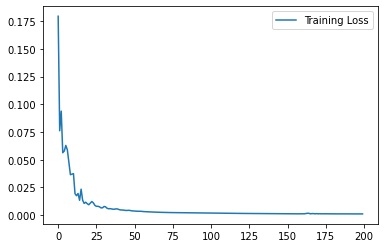

In [20]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [21]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.08 RMSE
Test Score: 0.06 RMSE


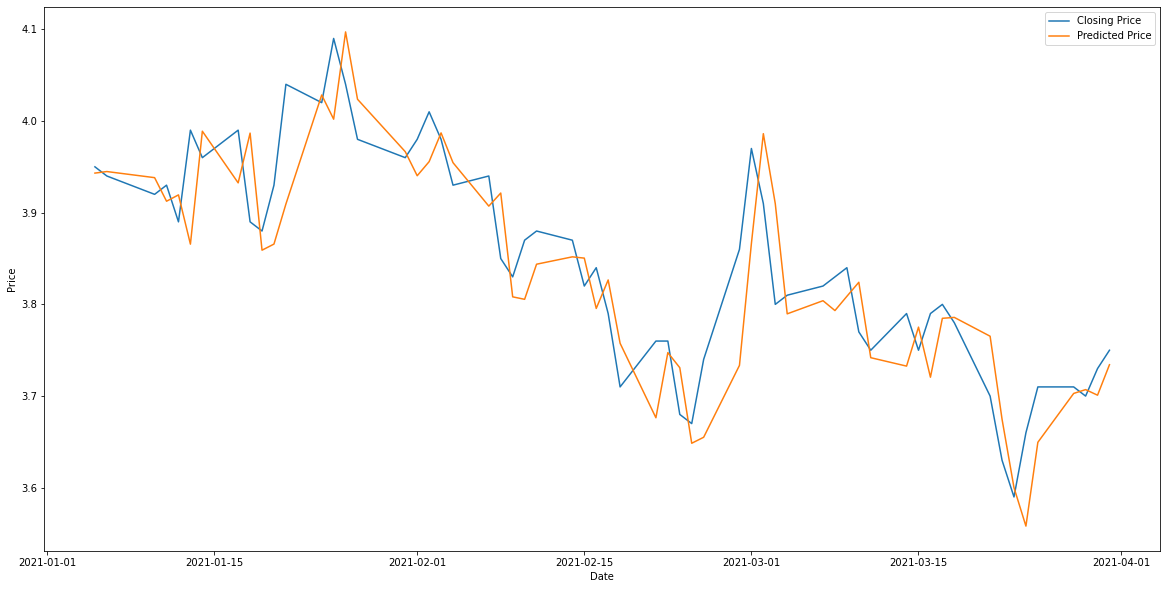

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The daily price predictions are very accurate. The stock does seem to be on a downtrend for the first quarter of 2021 so let's see if we can turn a profit using bollinger bands with this data.

In [27]:
boll_daily = MNHD[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 15)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 15)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2655790137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2655790137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2655790137.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,4.810000,NaN,NaN,NaN
1,2020-01-05,4.410000,NaN,NaN,NaN
2,2020-01-06,4.280000,NaN,NaN,NaN
3,2020-01-08,4.410000,NaN,NaN,NaN
4,2020-01-09,4.620000,NaN,NaN,NaN
...,...,...,...,...,...
300,2021-03-25,3.649605,3.734609,3.894736,3.574482
301,2021-03-28,3.702877,3.727867,3.883937,3.571798
302,2021-03-29,3.707067,3.722121,3.874167,3.570075
303,2021-03-30,3.700963,3.714932,3.859425,3.570440


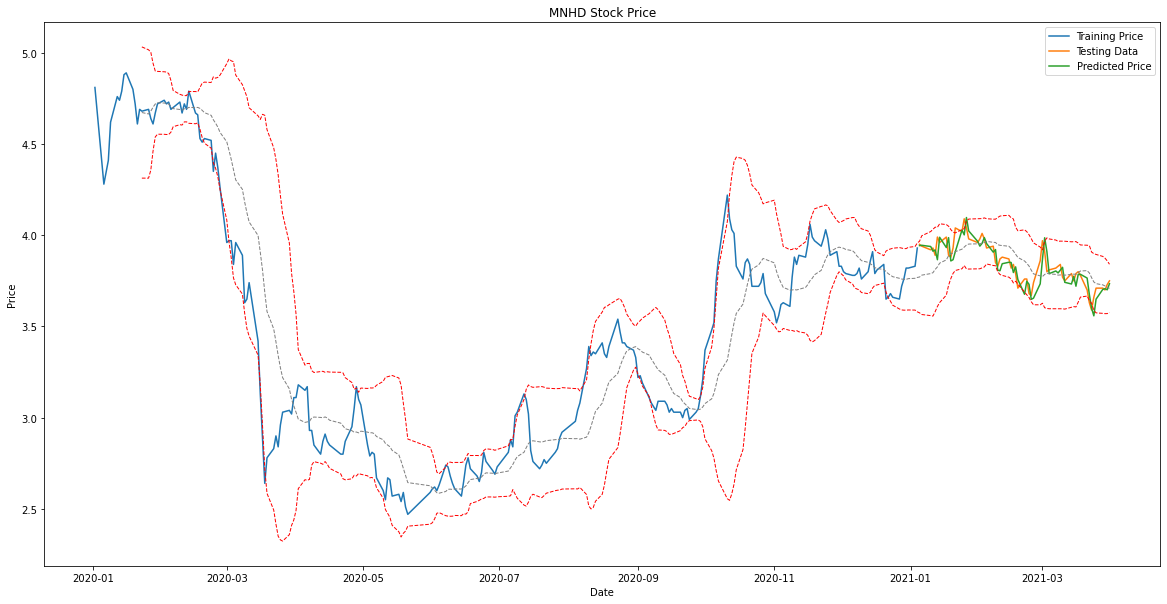

In [28]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MNHD Stock Price')
plt.legend()
plt.show()

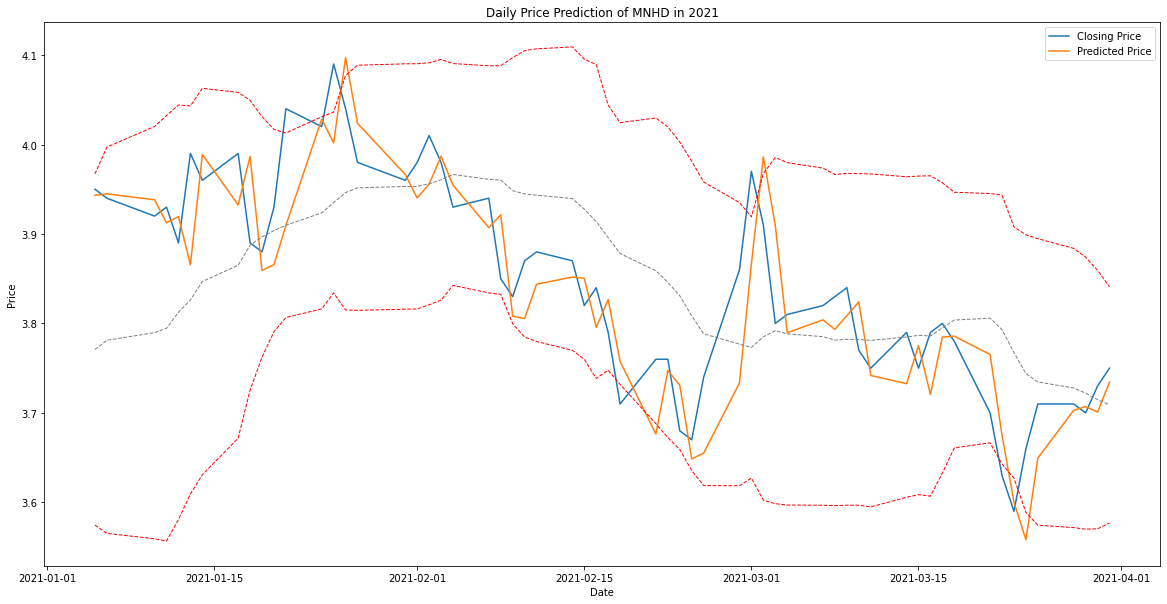

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][245:], boll_daily['upper_bb'][245:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][245:], boll_daily['lower_bb'][245:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][245:], boll_daily['SMA'][245:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of MNHD in 2021')
plt.legend()
plt.show()

The investment strategy with bollinger bands is to buy when price hits the lower band and sell when price hits the upper band. It looks like there are several buying indicators that we can use as well as one selling indicator.

In [33]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-04']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2686279449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
245,2021-01-05,3.943165,3.770878,3.967110,3.574646,3.95
246,2021-01-06,3.944854,3.781201,3.997057,3.565345,3.94
247,2021-01-10,3.938199,3.789748,4.020152,3.559344,3.92
248,2021-01-11,3.912491,3.794581,4.032423,3.556738,3.93
249,2021-01-12,3.919401,3.812541,4.044199,3.580882,3.89
250,2021-01-13,3.865684,3.826253,4.043091,3.609415,3.99
251,2021-01-14,3.988841,3.846842,4.062813,3.630872,3.96
252,2021-01-17,3.932521,3.865010,4.058276,3.671745,3.99
253,2021-01-18,3.986769,3.887462,4.049384,3.725540,3.89
254,2021-01-19,3.859097,3.896735,4.031151,3.762319,3.88


In [34]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
276,2021-02-21,3.676361,3.858804,4.029673,3.687936,3.76
298,2021-03-23,3.600183,3.767391,3.907832,3.626949,3.59
299,2021-03-24,3.558224,3.743948,3.899090,3.588806,3.66


In [36]:
i_df[i_df['Date'] == '2021-02-24']

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
279,2021-02-24,3.648558,3.808403,3.981268,3.635538,3.67


In [35]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
259,2021-01-26,4.097134,3.946244,4.077297,3.815190,4.04
283,2021-03-02,3.986158,3.785053,3.967578,3.602528,3.91


The first buying indicator I will be using is at the bottom of the first downtrend on 02-24-2021 with a closing price of \\$3.67. The selling indicator I will be using is on 03-02-2021 with a closing price fo \\$3.91. This leads to a profit of 6.5%

I would also recommend buying again on the indicator at 03-24-2021 at a closing price of \\$3.66.

## Weekly

In [60]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [61]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(MNHD, testing_data, scaler, 15)

In [62]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [63]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.22095391154289246
Epoch  1 MSE:  0.14202772080898285
Epoch  2 MSE:  0.06613373756408691
Epoch  3 MSE:  0.2206742763519287
Epoch  4 MSE:  0.05300334468483925
Epoch  5 MSE:  0.06860082596540451
Epoch  6 MSE:  0.08864309638738632
Epoch  7 MSE:  0.09527505189180374
Epoch  8 MSE:  0.09375512599945068
Epoch  9 MSE:  0.0877884104847908
Epoch  10 MSE:  0.0795249193906784
Epoch  11 MSE:  0.07051649689674377
Epoch  12 MSE:  0.062329284846782684
Epoch  13 MSE:  0.05686335265636444
Epoch  14 MSE:  0.05608123540878296
Epoch  15 MSE:  0.05968979001045227
Epoch  16 MSE:  0.062365345656871796
Epoch  17 MSE:  0.060800451785326004
Epoch  18 MSE:  0.05626073107123375
Epoch  19 MSE:  0.051314759999513626
Epoch  20 MSE:  0.04732338711619377
Epoch  21 MSE:  0.04417848959565163
Epoch  22 MSE:  0.040899839252233505
Epoch  23 MSE:  0.0360276959836483
Epoch  24 MSE:  0.028499353677034378
Epoch  25 MSE:  0.021718116477131844
Epoch  26 MSE:  0.02417372167110443
Epoch  27 MSE:  0.02276217751204967

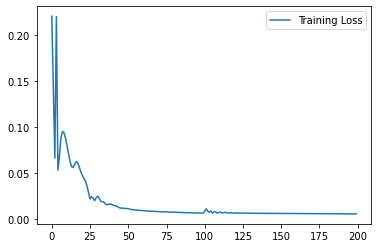

In [64]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [65]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.06 RMSE
Test Score: 3.28 RMSE


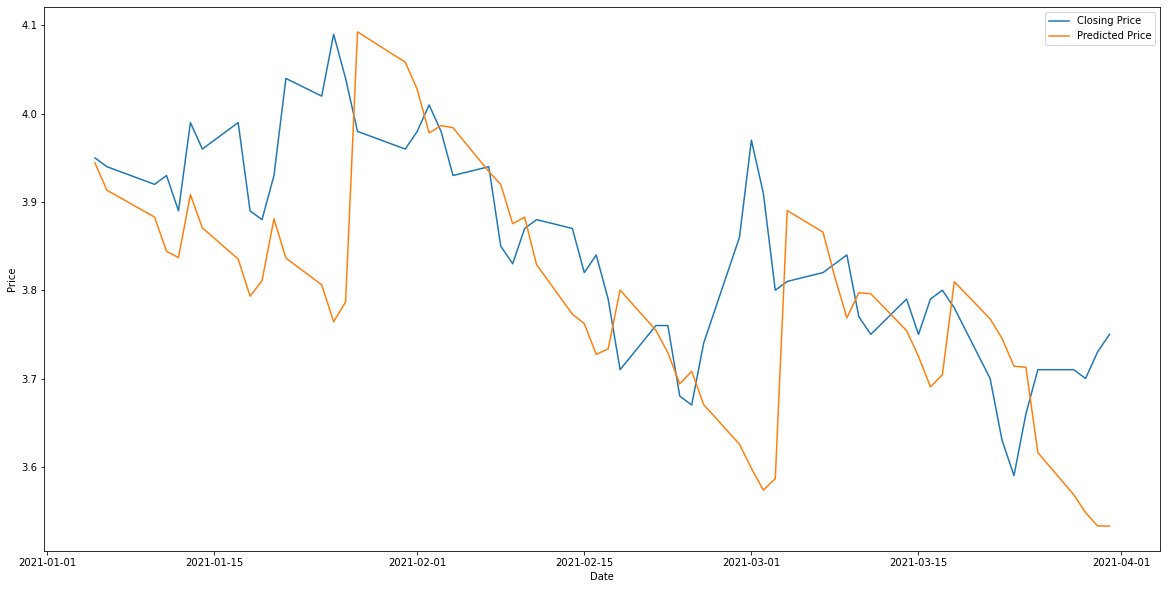

In [66]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The weekly price predictions seems to capture the general trend of the closing price but it is not as accurate as the daily price predictions.

In [70]:
boll_weekly = MNHD[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 15)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2659095788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2659095788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2659095788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,4.810000,NaN,NaN,NaN
1,2020-01-05,4.410000,NaN,NaN,NaN
2,2020-01-06,4.280000,NaN,NaN,NaN
3,2020-01-08,4.410000,NaN,NaN,NaN
4,2020-01-09,4.620000,NaN,NaN,NaN
...,...,...,...,...,...
300,2021-03-25,3.616093,3.752107,3.875149,3.629065
301,2021-03-28,3.568395,3.732279,3.871573,3.592985
302,2021-03-29,3.547987,3.714518,3.875228,3.553808
303,2021-03-30,3.533019,3.698801,3.881393,3.516208


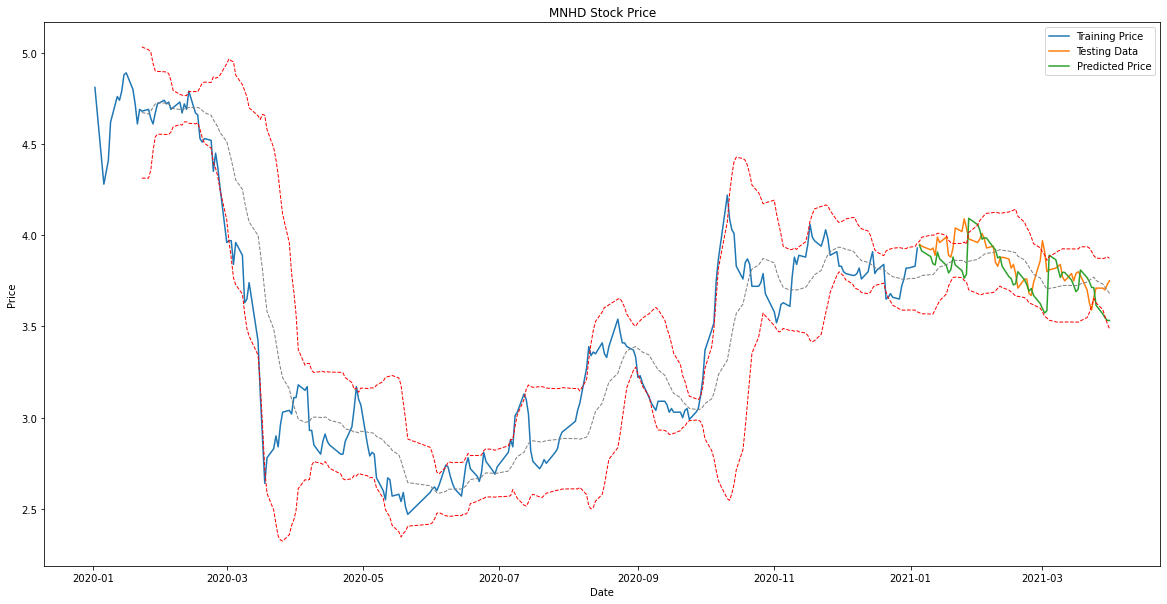

In [71]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MNHD Stock Price')
plt.legend()
plt.show()

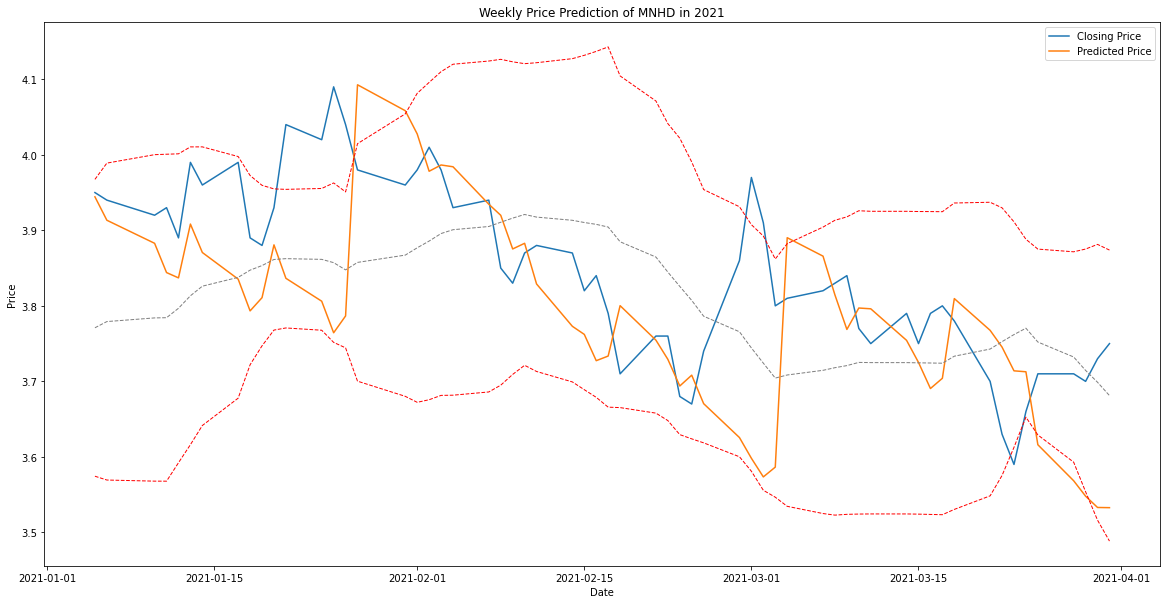

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][245:], boll_weekly['upper_bb'][245:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][245:], boll_weekly['lower_bb'][245:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][245:], boll_weekly['SMA'][245:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of MNHD in 2021')
plt.legend()
plt.show()

It looks like there are a couple buying indicators and selling indicators we can use by looking at the graph. Let's see if it's a profitable strategy.

In [76]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-04']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/776260440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
245,2021-01-05,3.944381,3.770959,3.967496,3.574421,3.95
246,2021-01-06,3.913362,3.779183,3.989010,3.569355,3.94
247,2021-01-10,3.882810,3.784037,4.000193,3.567881,3.92
248,2021-01-11,3.844069,3.784308,4.000775,3.567841,3.93
249,2021-01-12,3.837044,3.796778,4.001307,3.592248,3.89
250,2021-01-13,3.908300,3.813331,4.010476,3.616186,3.99
251,2021-01-14,3.870631,3.826040,4.010520,3.641560,3.96
252,2021-01-17,3.835394,3.837733,3.997717,3.677748,3.99
253,2021-01-18,3.793333,3.847288,3.972577,3.721999,3.89
254,2021-01-19,3.810828,3.853343,3.959602,3.747085,3.88


In [77]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
300,2021-03-25,3.616093,3.752107,3.875149,3.629065,3.71
301,2021-03-28,3.568395,3.732279,3.871573,3.592985,3.71
302,2021-03-29,3.547987,3.714518,3.875228,3.553808,3.70


In [83]:
i_df[(i_df['Date'] == '2021-01-25') | (i_df['Date'] == '2021-03-01')]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
258,2021-01-25,3.764342,3.857191,3.962751,3.751631,4.09
282,2021-03-01,3.598162,3.744238,3.907492,3.580985,3.97


In [78]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
260,2021-01-27,4.092731,3.857523,4.014780,3.700265,3.98
261,2021-01-31,4.058397,3.867192,4.054187,3.680197,3.96
285,2021-03-04,3.890239,3.708440,3.882339,3.534541,3.81


The first buy indicator I will use is on 01-25-2021 with a closing price of \\$4.09. The first sell indicator I will use is on 01-27-2021 with a closing price of \\$3.98. This results in a 2.7% loss.

The second buy indicator I will use is on 03-01-2021 with a closing price of \\$3.97. The second sell indicator I will use is on 03-04-2021 with a closing price of \\$3.81. This results in a 4% loss.

Using the weekly data I would lose 6.6% of my investment.

# Monthly

In [118]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [119]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 45)
X_test_m, y_test_m = get_monthly_test_data(MNHD, testing_data, scaler, 45)

In [120]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [121]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.13502798974514008
Epoch  1 MSE:  0.1004166230559349
Epoch  2 MSE:  0.05954710394144058
Epoch  3 MSE:  0.14475862681865692
Epoch  4 MSE:  0.042147450149059296
Epoch  5 MSE:  0.04312390461564064
Epoch  6 MSE:  0.051063310354948044
Epoch  7 MSE:  0.0518115870654583
Epoch  8 MSE:  0.048789337277412415
Epoch  9 MSE:  0.04522138461470604
Epoch  10 MSE:  0.04314395785331726
Epoch  11 MSE:  0.042977891862392426
Epoch  12 MSE:  0.042703889310359955
Epoch  13 MSE:  0.040802694857120514
Epoch  14 MSE:  0.038218479603528976
Epoch  15 MSE:  0.036257434636354446
Epoch  16 MSE:  0.035398032516241074
Epoch  17 MSE:  0.03537681698799133
Epoch  18 MSE:  0.03565753623843193
Epoch  19 MSE:  0.03578220307826996
Epoch  20 MSE:  0.035533055663108826
Epoch  21 MSE:  0.03494184464216232
Epoch  22 MSE:  0.034191008657217026
Epoch  23 MSE:  0.033465221524238586
Epoch  24 MSE:  0.032805539667606354
Epoch  25 MSE:  0.03203465789556503
Epoch  26 MSE:  0.03085879236459732
Epoch  27 MSE:  0.029148587

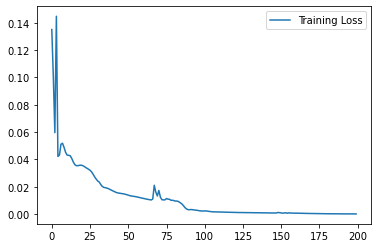

In [122]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [123]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.02 RMSE
Test Score: 3.32 RMSE


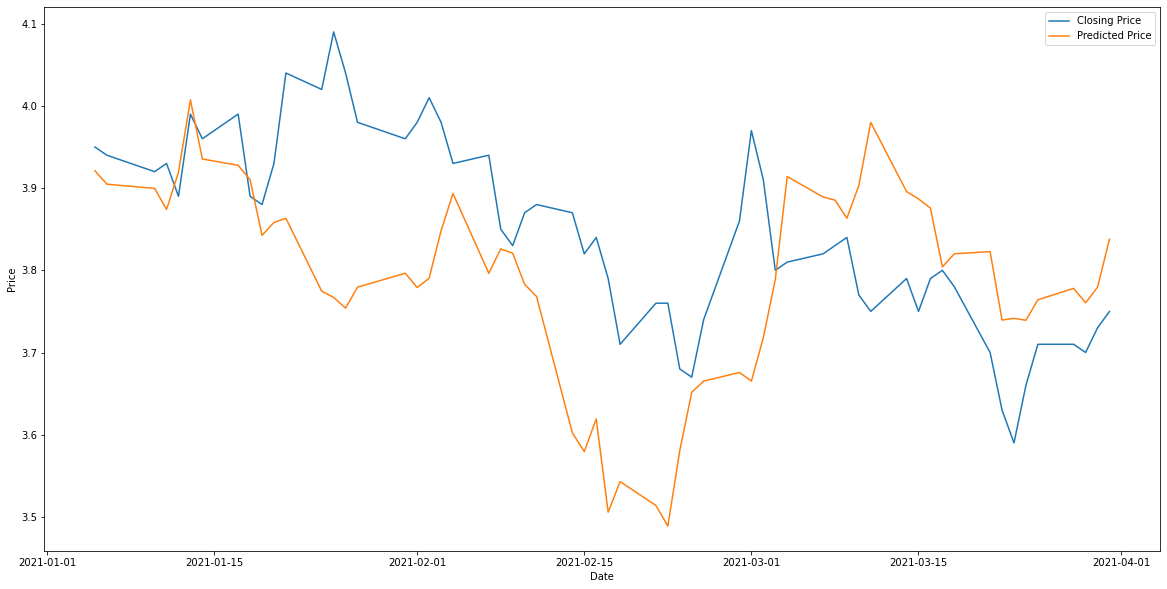

In [124]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly price predictions are not very accurate. It looks like it would be hard to turn a profit using this data.

In [125]:
boll_monthly = MNHD[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 20)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2896065412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2896065412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/2896065412.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,4.810000,NaN,NaN,NaN
1,2020-01-05,4.410000,NaN,NaN,NaN
2,2020-01-06,4.280000,NaN,NaN,NaN
3,2020-01-08,4.410000,NaN,NaN,NaN
4,2020-01-09,4.620000,NaN,NaN,NaN
...,...,...,...,...,...
300,2021-03-25,3.764133,3.818624,3.992860,3.644389
301,2021-03-28,3.778003,3.823740,3.985894,3.661586
302,2021-03-29,3.760396,3.828495,3.976001,3.680990
303,2021-03-30,3.779490,3.831568,3.971764,3.691372


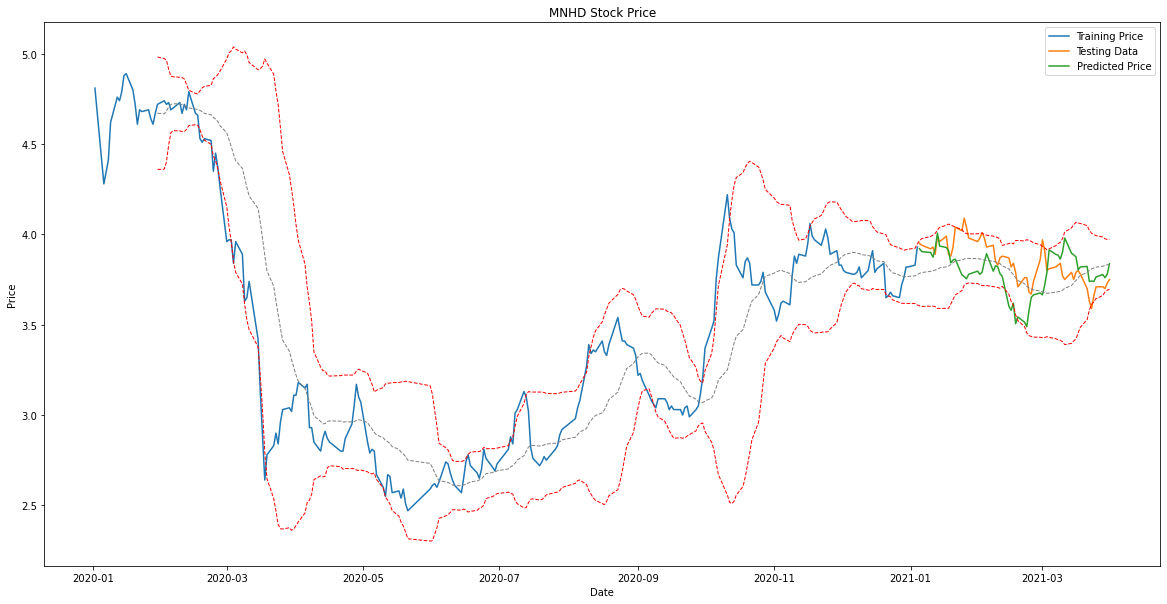

In [126]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MNHD Stock Price')
plt.legend()
plt.show()

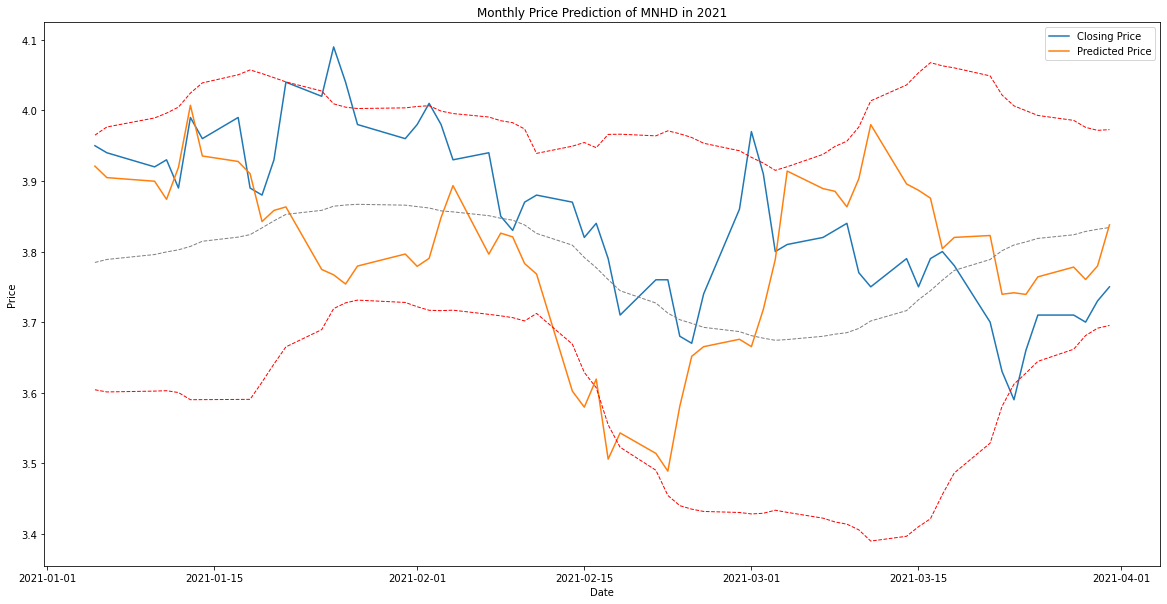

In [127]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][245:], boll_monthly['upper_bb'][245:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][245:], boll_monthly['lower_bb'][245:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][245:], boll_monthly['SMA'][245:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of MNHD in 2021')
plt.legend()
plt.show()

Looks like there are a couple buying indicators that can be used and two possible selling indicators.

In [128]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-04']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_20892/3829502227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
245,2021-01-05,3.921041,3.784552,3.964948,3.604156,3.95
246,2021-01-06,3.904769,3.788791,3.976527,3.601054,3.94
247,2021-01-10,3.899651,3.795773,3.989300,3.602246,3.92
248,2021-01-11,3.874040,3.799475,3.996150,3.602801,3.93
249,2021-01-12,3.919339,3.802442,4.004673,3.600211,3.89
250,2021-01-13,4.007316,3.807308,4.024560,3.590055,3.99
251,2021-01-14,3.935437,3.814580,4.039010,3.590149,3.96
252,2021-01-17,3.927675,3.820463,4.050489,3.590438,3.99
253,2021-01-18,3.910237,3.823975,4.057376,3.590574,3.89
254,2021-01-19,3.842544,3.833602,4.052203,3.615002,3.88


In [129]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
271,2021-02-14,3.602226,3.809053,3.949302,3.668804,3.87
272,2021-02-15,3.579481,3.791643,3.954513,3.628773,3.82
274,2021-02-17,3.505812,3.760256,3.966000,3.554512,3.79


In [130]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price


In [131]:
i_df[i_df['Date'] == '2021-03-04']

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
285,2021-03-04,3.914039,3.6753,3.920195,3.430405,3.81


The buying indicator I would use is the one with the lowest predicted price on 02-17-2021 with a closing price of \\$3.79. The selling indicator I would use is on 03-04-2021 with a closing price of \\$3.81. This results in a profit of 0.5%.

Even with inaccurate predictions we were able to make a profit albeit an insignificant amount.

# Conclusion

Using price predictions with an LSTM model on MNHD, I was only able to make a profit using daily price predictions with a profit of 6.5%. The weekly predictions resulted in a loss of 6.6% and the monthly predictions resulted in a meager profit of 0.5%.

I would recommend an investment strategy using the indicators given with the daily price predictions. Using this strategy leads to a profit of 6.5%.